# LunarLanderContinuous-v2
---
In this notebook, you will implement a DDPG agent with OpenAI Gym's LunarLanderContinuous-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym.spaces
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [2]:
env = gym.make('LunarLanderContinuous-v2')
env.seed(0)

# size of each action
action_size = env.action_space.shape[0]
print('Size of each action:', action_size)

# examine the state space 
states = env.observation_space.shape
state_size = states[0]
print('Size of state:', state_size)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Size of each action: 2
Size of state: 8


### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

In [3]:
from collections import deque
from itertools import count
import time
import torch
from ddpg_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)

Episode 50, Average Score: -385.87, Max: -144.24, Min: -1252.28, Time: 0.31
Episode 100, Average Score: -435.20, Max: -144.24, Min: -1252.28, Time: 0.35
Episode 150, Average Score: -414.76, Max: -144.24, Min: -1252.28, Time: 0.36
Episode 200, Average Score: -371.16, Max: -144.24, Min: -1252.28, Time: 0.63
Episode 250, Average Score: -247.23, Max: -144.24, Min: -1252.28, Time: 1.43
Episode 300, Average Score: -222.53, Max: -114.86, Min: -1252.28, Time: 0.64
Episode 350, Average Score: -211.23, Max: -54.11, Min: -1252.28, Time: 1.31
Episode 400, Average Score: -222.35, Max: -54.11, Min: -1252.28, Time: 0.66
Episode 450, Average Score: -199.97, Max: -54.11, Min: -1252.28, Time: 3.32
Episode 500, Average Score: -186.06, Max: -54.11, Min: -1252.28, Time: 6.03
Episode 550, Average Score: -158.31, Max: -48.81, Min: -1252.28, Time: 5.11
Episode 600, Average Score: -205.82, Max: -48.81, Min: -1252.28, Time: 8.69
Episode 650, Average Score: -204.77, Max: -48.81, Min: -1252.28, Time: 2.50
Episode

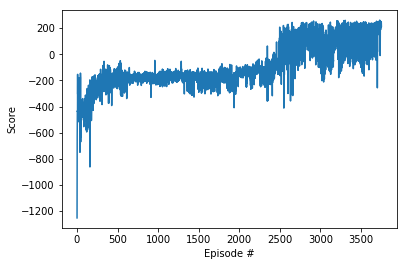

In [4]:
def ddpg(n_episodes=100000, max_t=50000, print_every=50):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        score = 0
        timestep = time.time()
        for t in range(max_t):
            action = agent.act(state)
            action = np.clip(action, -1, 1)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done, t)
            state = next_state
            score += reward
            if done:
                break 
                
        scores_deque.append(score)
        scores.append(score)
        score_average = np.mean(scores_deque)
        
        if i_episode % print_every == 0:
            print('\rEpisode {}, Average Score: {:.2f}, Max: {:.2f}, Min: {:.2f}, Time: {:.2f}'\
                  .format(i_episode, score_average, np.max(scores), np.min(scores), time.time() - timestep), end="\n")
                    
        if np.mean(scores_deque) >= 200.0:            
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, score_average))            
            break            
            
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [7]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

for _ in range(5):
    state = env.reset()
    for t in range(1200):
        action = agent.act(state, add_noise=False)
        env.render()
        state, reward, done, _ = env.step(action)
        if done:
            break 

env.close()